# Entrega 2

S3E16 Kaggle dataset description:

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Wild blueberry Yield Prediction Dataset. Feature distributions are close to, but not exactly the same, as the original. 

In [60]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from itertools import product

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("playground-series-s3e16/train.csv")

In [39]:
print("El playground series episodio 18 tiene ", len(df), " filas y ", df.shape[1], " columnas.")

El playground series episodio 18 tiene  15289  filas y  18  columnas.


## Dataframe: Playground series 3 episode 16

### Predecir el rendimiento de un campo de arandanos (Regresion)

Para el primer dataframe, se describen las siguientes features:

Features Unit Description:

Clonesize m2 The average blueberry clone size in the field

Honeybee bees/m2/min Honeybee density in the field

Bumbles bees/m2/min Bumblebee density in the field

Andrena bees/m2/min Andrena bee density in the field

Osmia bees/m2/min Osmia bee density in the field

MaxOfUpperTRange ℃ The highest record of the upper band daily air temperature during the bloom season

MinOfUpperTRange ℃ The lowest record of the upper band daily air temperature

AverageOfUpperTRange ℃ The average of the upper band daily air temperature

MaxOfLowerTRange ℃ The highest record of the lower band daily air temperature

MinOfLowerTRange ℃ The lowest record of the lower band daily air temperature

AverageOfLowerTRange ℃ The average of the lower band daily air temperature

RainingDays Day The total number of days during the bloom season, each of which has precipitation larger than zero

AverageRainingDays Day The average of raining days of the entire bloom season

In [40]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,15289.0,7644.000000,4413.698468,0.000000,3822.000000,7644.000000,11466.000000,15288.000000
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000


# Seaborn plots

## Matriz triangular de correlación

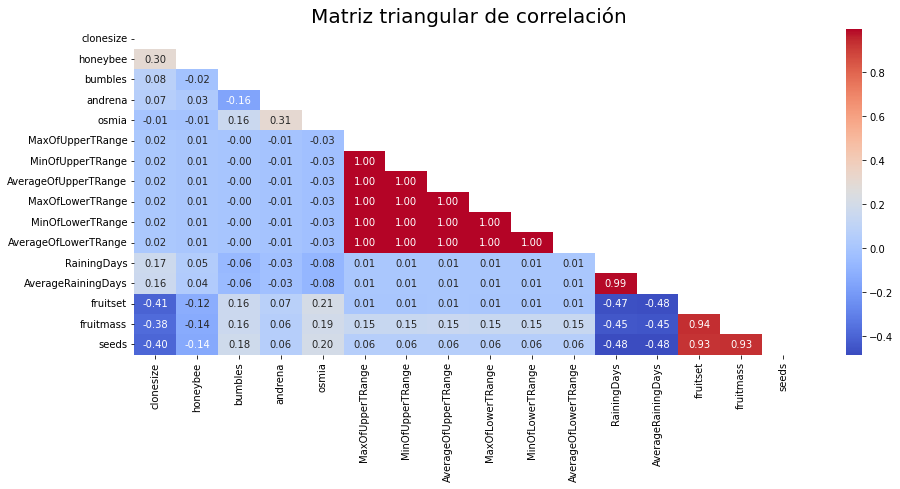

In [41]:
# Extraigo las variables utiles
variables_df = df.drop(['id','yield'], axis=1)

# Calculo la matriz de correlación
correlation_matrix = variables_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Ploteo
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title('Matriz triangular de correlación', size = 20)
plt.show()

Como veo que hay un grupo de variables que estan altamente correlacionadas, vamos a analizar la distribucion de los datos de las mismas.

In [42]:
# Uso esta funcion para extraer el numero de filas dado el numero de columnas que quiero usar para los subplots.

def get_n_rows_axes(n_features, n_cols=5, n_rows=None):
    n_rows = int(np.ceil(n_features / n_cols))
    current_col = range(1, n_cols + 1)
    current_row = range(1, n_rows + 1)
    return n_rows, list(product(current_row, current_col))

## Plots de distribución de probabilidad

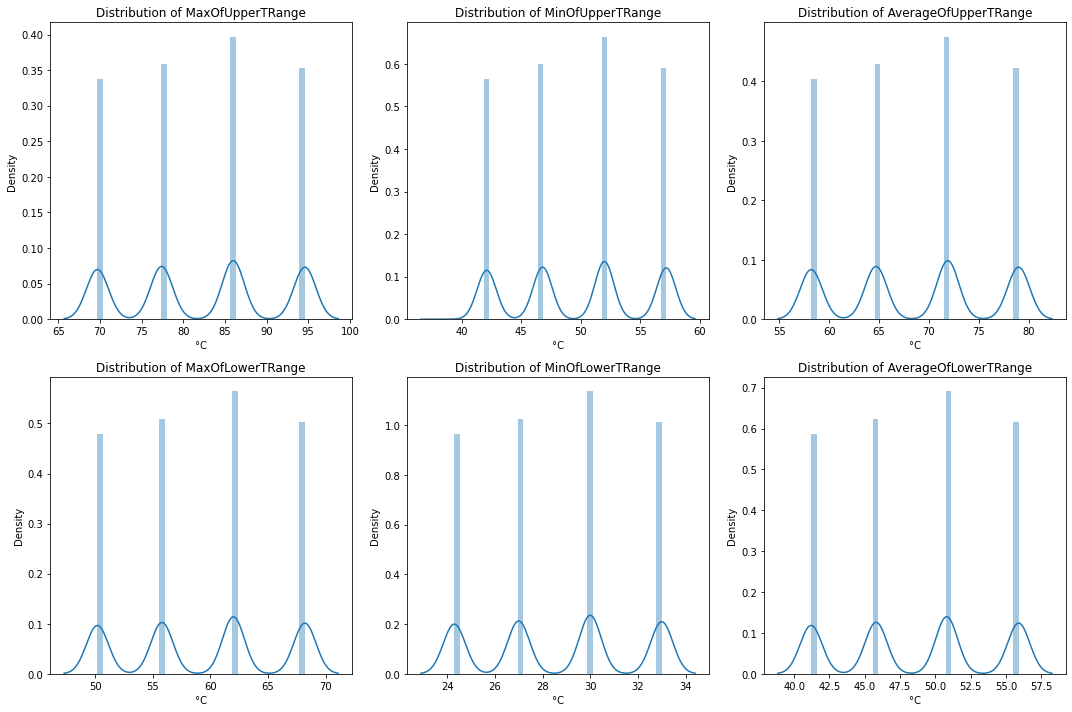

In [71]:
TRange_df = df[[col for col in df.columns if 'TRange' in col]]

n_cols = 3

n_rows, axes = get_n_rows_axes(len(TRange_df.columns), n_cols=n_cols)

plt.figure(figsize=(15, 10))

for i, column in enumerate(TRange_df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.distplot(TRange_df[column], kde=True, hist=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('°C')

plt.tight_layout()
plt.show()

Esto muestra la densidad de probabilidad junto con el histograma normalizado. Parecen tener la misma forma en cuanto a distribución, esto se puede ver en el siguiente boxplot:

## Boxplots

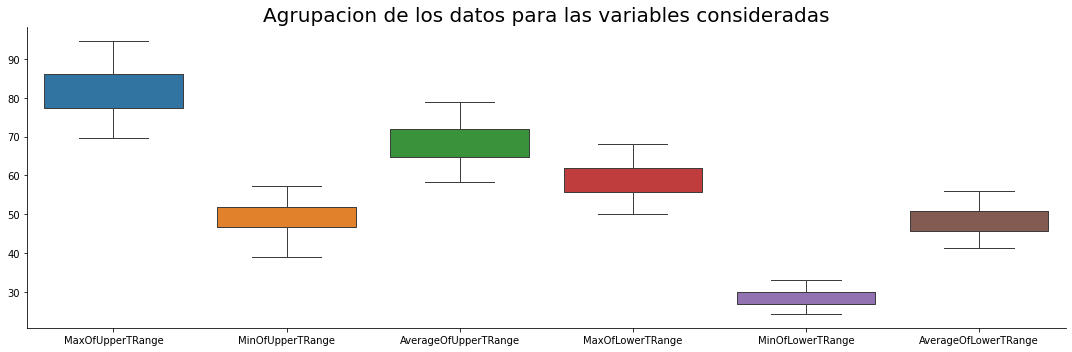

In [86]:
TRange_df = df[[col for col in df.columns if 'TRange' in col]]

plt.figure(figsize=(15, 5))
sns.boxplot(data=TRange_df)
plt.xlabel('')
plt.title('Agrupacion de los datos para las variables consideradas', size = 20)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Aca vemos que tiene sentido que estas variables esten correlacionadas, ya que el rango superior de temperatura (minimo y maximo) estan atados el uno al otro. Esto sugiere que cuando uno es mas alto, el otro tiende a ser mas alto también, por lo que la distribución del rango de temperaturas suele mantenerse estable. En cuanto al average, claramente esta correlacionado porque se obtiene de los datos anteriormente mencionados.

# Matplotlib plots

## Grafico de lineas

Queremos entonces visualizar esto, observando los rangos para maximo y minimo, y como se comportan para cada registro de nuestro dataframe. Ploteo los primeros 300 para observar bien el grafico.

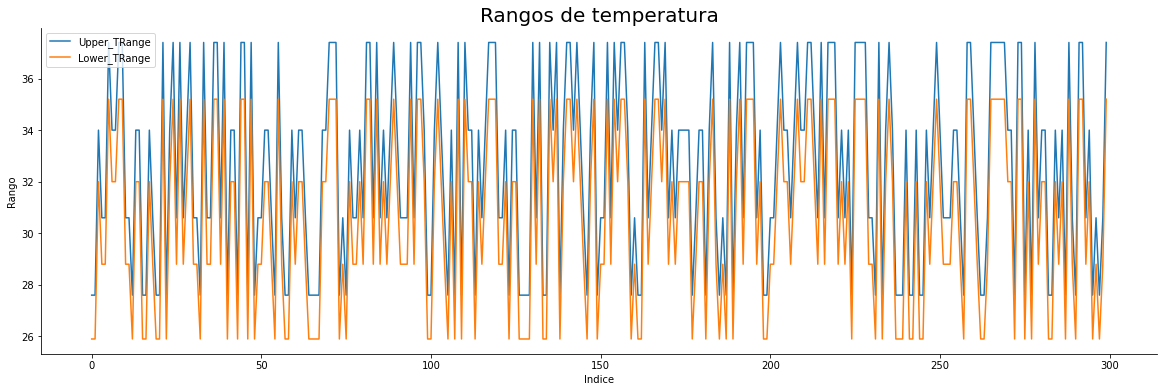

In [87]:
ranges_df = pd.DataFrame()

ranges_df["Upper_TRange"] = TRange_df['MaxOfUpperTRange'] - TRange_df['MinOfUpperTRange']
ranges_df["Lower_TRange"] = TRange_df['MaxOfLowerTRange'] - TRange_df['MinOfLowerTRange']

plt.figure(figsize=(20, 6))
sns.lineplot(data=ranges_df[0:300], dashes=False)
plt.title('Rangos de temperatura', size = 20)
plt.xlabel('Indice')
plt.ylabel('Rango')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Vamos a analizar la distribución del yield, para ver si nuestra variable target tiene algun outlier significativo.

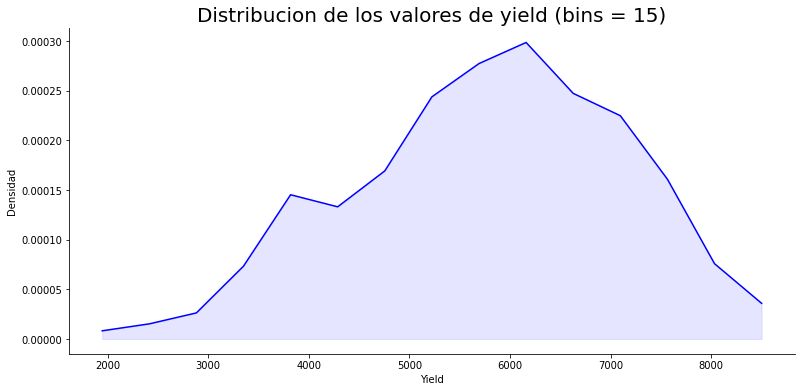

In [105]:
values = df['yield']

bins = 15
density = np.histogram(values, bins=bins, density=True)

plt.figure(figsize=(13, 6))
plt.plot(density[1][:-1], density[0], label=feature, color='blue')

plt.fill_between(density[1][:-1], 0, density[0], alpha=0.1, color='blue')

plt.title('Distribucion de los valores de yield '+ "(bins = "+str(bins)+')', size = 20)
plt.xlabel('Yield')
plt.ylabel('Densidad')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  
plt.show()

No parece haber algun outlier. Los valores bajos deberian ser los mas dificiles de obtener, ya que el grafico esta significativamente skewed hacia la derecha.

Una hipotesis muy simple puede ser que los dias de lluvia afectan principalmente al yield. Podríamos asumir que sus distribuciones deberian tener una forma muy similar.

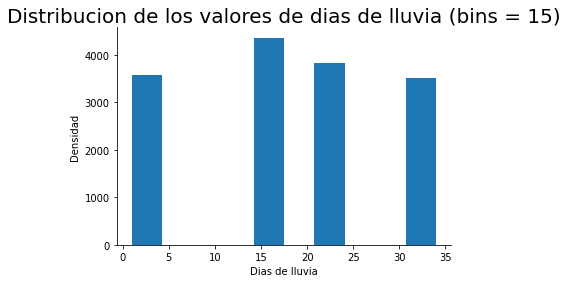

In [108]:
values = df['RainingDays']

bins = 15
density = np.histogram(values, bins=bins, density=True)

plt.hist(values)
plt.title('Distribucion de los valores de dias de lluvia '+ "(bins = "+str(bins)+')', size = 20)
plt.xlabel('Dias de lluvia')
plt.ylabel('Densidad')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  
plt.show()

In [111]:
values.value_counts()

16.00    4361
24.00    3837
34.00    3521
1.00     3521
3.77       48
26.00       1
Name: RainingDays, dtype: int64

Notamos aca, que los valores se encuentran dentro de ciertos grupos, y parece haber valores extraños, que se deben tratar al realizar el posterior analisis.